In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '16'


$x = 2$

\begin{equation}
x = 2
\label{S}
\end{equation}

In [3]:
y_bar = 0.06

def bond_val(c, y, T: int):
    # time step
    ts = np.arange(1, T+1, dtype=float)
    # cash flows
    cf = c * np.ones(T, dtype=float)
    cf[-1] += 1
    # discounting
    df = 1.0/(1.0 + y)**ts

    # value
    v = np.sum(cf * df)
    return v
    

In [4]:
market_ylds = np.linspace(0.0, 0.12, 11) * 100
bond_cpns = np.linspace(0.0, 0.12, 21) * 100
y_bar_index = market_ylds.size//2

In [5]:
T = 10
pvs = np.array([[bond_val(c/100,y/100,T) for y in market_ylds] for c in bond_cpns])

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('RdBu')

rgba = cmap(0.5)

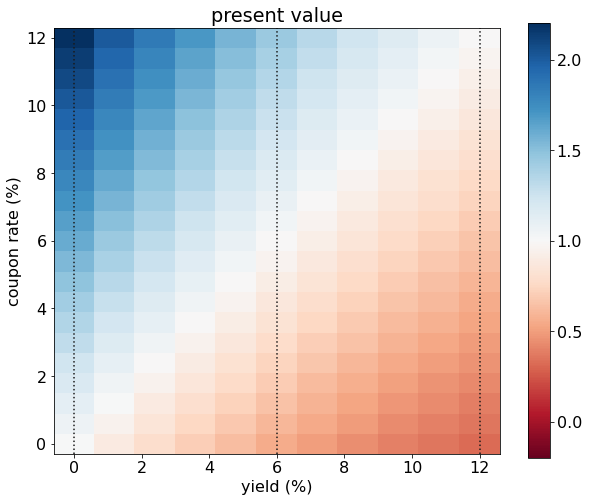

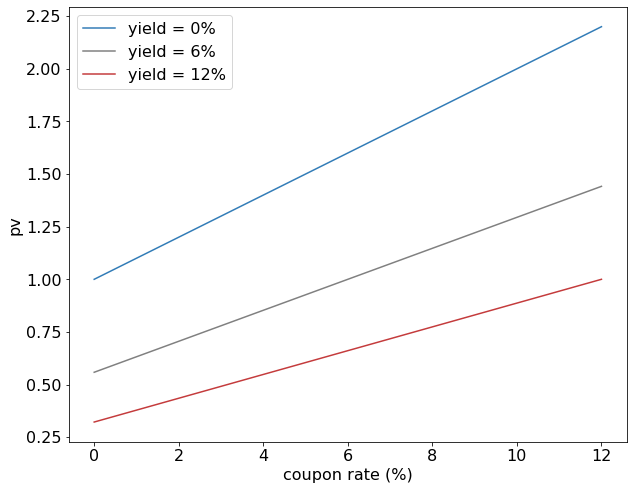

In [7]:
from matplotlib.colors import Normalize 
max_dev = np.abs(pvs-1.0).max()
norm = Normalize(1-max_dev, 1+max_dev)
plt.figure(figsize=(10,8))
plt.pcolor(market_ylds, bond_cpns, pvs, cmap='RdBu', norm=norm)
plt.gca().set_aspect('equal')
plt.xlabel('yield (%)'), plt.ylabel('coupon rate (%)')
for y in [0, 6, 12]:
    plt.axvline(y, c = np.ones(3)*0.1, ls=':')
plt.colorbar()
plt.title('present value')
plt.savefig('pv-2d.png')
plt.show()

plt.figure(figsize=(10,8))
for n, (i,c) in zip(['0%', '6%', '12%'], zip([0, y_bar_index, -1], [cmap(0.85), 0.5*np.ones(3), cmap(0.15)])):
    plt.plot(bond_cpns, pvs[:,i], color=c, label=f'yield = {n}')
plt.legend()
plt.xlabel('coupon rate (%)'), plt.ylabel('pv')
plt.savefig('pv-1d.png')
plt.show()


In [13]:
market_ylds.size, pvs_cvadj.shape

(11, (21, 11))

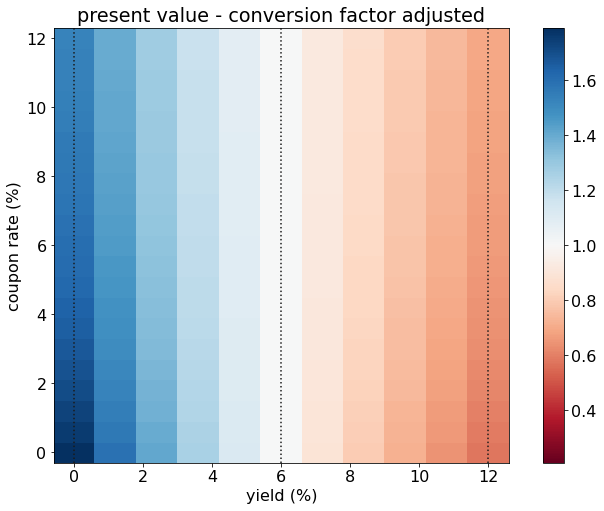

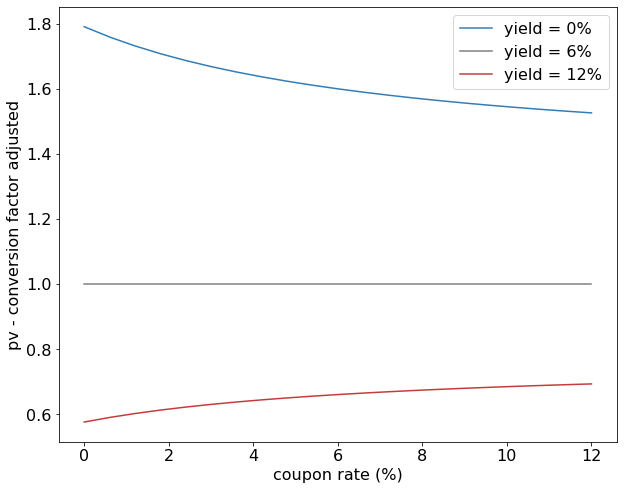

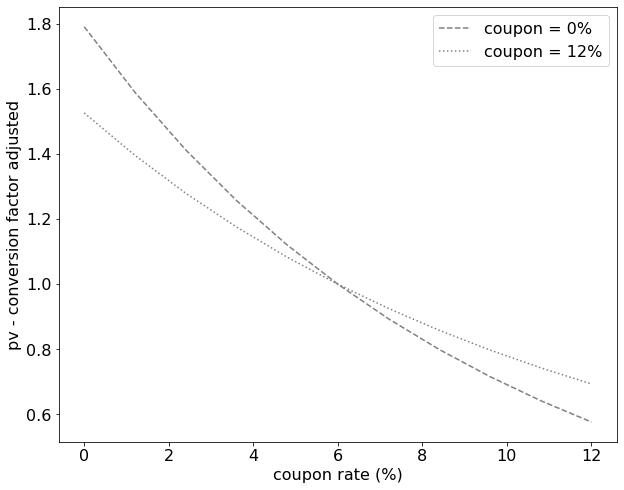

In [16]:
cvf = pvs[:, market_ylds.size//2].reshape((-1,1))

pvs_cvadj = pvs/cvf

max_dev = np.abs(pvs_cvadj-1.0).max()
norm = Normalize(1-max_dev, 1+max_dev)
plt.figure(figsize=(12,8))
plt.pcolor(market_ylds, bond_cpns, pvs_cvadj, cmap='RdBu', norm=norm)
plt.gca().set_aspect('equal')
plt.xlabel('yield (%)'), plt.ylabel('coupon rate (%)')
for y in [0, 6, 12]:
    plt.axvline(y, c = np.ones(3)*0.1, ls=':')
plt.colorbar()
plt.title('present value - conversion factor adjusted')
plt.savefig('adj-pv-2d.png')
plt.show()

plt.figure(figsize=(10,8))
for n, (i,c) in zip(['0%', '6%', '12%'], zip([0, y_bar_index, -1], [cmap(0.85), 0.5*np.ones(3), cmap(0.15)])):
    plt.plot(bond_cpns, pvs_cvadj[:,i], color=c, label=f'yield = {n}')
plt.legend()
plt.xlabel('coupon rate (%)'), plt.ylabel('pv - conversion factor adjusted')
plt.savefig('adj-pv-1d.png')
plt.show()

plt.figure(figsize=(10,8))
for n, (i,c) in zip(['0%', '12%'], zip([0, -1], ['--', ':'])):
    plt.plot(market_ylds, pvs_cvadj[i,:], ls=c, color = 0.5*np.ones(3), label=f'coupon = {n}')
plt.legend()
plt.xlabel('coupon rate (%)'), plt.ylabel('pv - conversion factor adjusted')
plt.savefig('adj-pv-1d-y.png')
plt.show()